In [8]:
#%matplotlib inline|

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import PIL
import glob

In [10]:
csv_path = "C:\\Users\\adeli\\Projects\\Kaggle\\StoreSales\\train.csv"
df = pd.read_csv(csv_path)
train_df = df
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [11]:
holidays_df = pd.read_csv("C:\\Users\\adeli\\Projects\\Kaggle\\StoreSales\\holidays_events.csv")
oil_df = pd.read_csv("C:\\Users\\adeli\\Projects\\Kaggle\\StoreSales\\oil.csv")
stores_df = pd.read_csv("C:\\Users\\adeli\\Projects\\Kaggle\\StoreSales\\stores.csv")
test_df = pd.read_csv("C:\\Users\\adeli\\Projects\\Kaggle\\StoreSales\\test.csv")
transactions_df = pd.read_csv("C:\\Users\\adeli\\Projects\\Kaggle\\StoreSales\\transactions.csv")

In [16]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [35]:
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [36]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [37]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [38]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [39]:
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


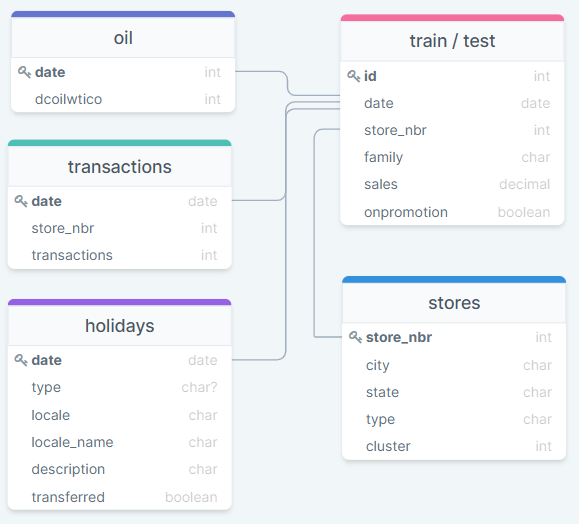

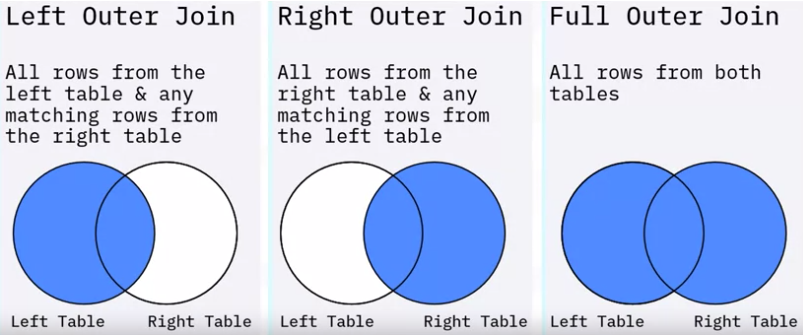

Use pd.concat to join train and testing data together. This is because a 'rolling window' or 'sliding window' method will be used to split the data into testing and training. 
Note: Append could have also been used. Pandas concatenate can be used to combine dataframes vertically or horizontally by specifying the axis. By default, concatenate on axis=0, meaning the dataframes are combined vertically, increasing the row number.

In [40]:
df = pd.concat([train_df, test_df], sort=True)
df = df.merge(holidays_df, on='date', how='left')
df = df.merge(oil_df, on='date', how='left')
df = df.merge(stores_df, on='store_nbr', how='left')
df = df.merge(transactions_df, on=['date', 'store_nbr'], how='left')
df.rename(columns = {'type_x':'holiday_type', 'type_y':'store_type'}, inplace = True)
df.head()

,date,family,id,onpromotion,sales,store_nbr,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions
0,2013-01-01,AUTOMOTIVE,0,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,2013-01-01,BABY CARE,1,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2013-01-01,BEAUTY,2,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,2013-01-01,BEVERAGES,3,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,2013-01-01,BOOKS,4,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


Breakdown Date & Time into columns: Year, Quarter of Year, Month, Week, Day of Week

In [41]:
# convert the Purchase Date to datetime
df['date'] = pd.to_datetime(df['date'])
# add a column for each date type
df['Year'] = df['date'].dt.year
df['Quarter'] = df['date'].dt.quarter
df['Month'] = df['date'].dt.month
df['Week'] = df['date'].dt.isocalendar().week
df['Day'] = df['date'].dt.day_name()
df.head()


,date,family,id,onpromotion,sales,store_nbr,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,Year,Quarter,Month,Week,Day
0,2013-01-01,AUTOMOTIVE,0,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
1,2013-01-01,BABY CARE,1,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
2,2013-01-01,BEAUTY,2,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
3,2013-01-01,BEVERAGES,3,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday
4,2013-01-01,BOOKS,4,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,NaN,2013,1,1,1,Tuesday


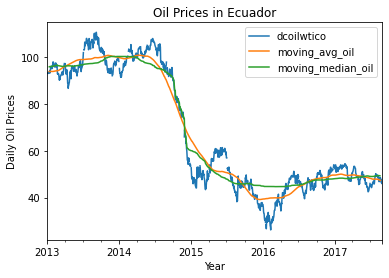

In [42]:
#Using rolling window to smooth out oil prices.

df_moving_avg_oil = pd.DataFrame()


df_moving_avg_oil[['date', 'dcoilwtico']] = oil_df[['date', 'dcoilwtico']]


df_moving_avg_oil['moving_median_oil'] = oil_df.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).median()              # compute the mean (could also do median, std, min, max, ...)


df_moving_avg_oil['moving_avg_oil'] = oil_df.rolling(
    window=183,       # Half year window
    center=True,      # puts the average at the center of the window
    min_periods=95,   # choose about half the window size
).mean()              # compute the mean

df_moving_avg_oil['date'] = pd.to_datetime(df_moving_avg_oil['date'])
df_moving_avg_oil['Year'] = df_moving_avg_oil['date'].dt.year

df_moving_avg_oil.plot.line(x='date', y=['dcoilwtico', 'moving_avg_oil', 'moving_median_oil'])

plt.xlabel('Year')
plt.ylabel('Daily Oil Prices')
plt.title("Oil Prices in Ecuador")

plt.show()


In [43]:
#Filling in missing values:

#Backfilling Syntax: DataFrame.backfill(axis=None, inplace=False, limit=None, downcast=None)
df_moving_avg_oil.bfill(axis ='rows', inplace=True)

#Check for missing values
df_moving_avg_oil.dcoilwtico.isnull().sum()

0

In [44]:
#Data transformations
#Holiday table is joined with the training/testing data on the date. For dates that do not have a corresponding 
#holiday or event, the cell is NaN. I will replace these cells and call them 'Work Day'
df['holiday_type'] = df['holiday_type'].replace(np.nan,'Work Day')
#Similarly, rows that don't have a holiday type, will be NaN for all columns associateed with the holidays events table. 
#I will replace these cells with an empty string ''
df[['locale','locale_name','description']] = df[['locale','locale_name','description']].replace(np.nan,' ')
#Non-holiday so nothing is transferred 'Work Day' 
df['transferred'] = df['transferred'].replace(np.nan,False)
#Days with no transaction data -> 0 transactions made.
df['transactions'] = df['transactions'].replace(np.nan, int(0))

In [45]:
df.locale.isnull().sum()

0

In [46]:
df.head()

,date,family,id,onpromotion,sales,store_nbr,holiday_type,locale,locale_name,description,...,city,state,store_type,cluster,transactions,Year,Quarter,Month,Week,Day
0,2013-01-01,AUTOMOTIVE,0,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,0.0,2013,1,1,1,Tuesday
1,2013-01-01,BABY CARE,1,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,0.0,2013,1,1,1,Tuesday
2,2013-01-01,BEAUTY,2,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,0.0,2013,1,1,1,Tuesday
3,2013-01-01,BEVERAGES,3,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,0.0,2013,1,1,1,Tuesday
4,2013-01-01,BOOKS,4,0,0.0,1,Holiday,National,Ecuador,Primer dia del ano,...,Quito,Pichincha,D,13,0.0,2013,1,1,1,Tuesday


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   family        object        
 2   id            int64         
 3   onpromotion   int64         
 4   sales         float64       
 5   store_nbr     int64         
 6   holiday_type  object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   bool          
 11  dcoilwtico    float64       
 12  city          object        
 13  state         object        
 14  store_type    object        
 15  cluster       int64         
 16  transactions  float64       
 17  Year          int64         
 18  Quarter       int64         
 19  Month         int64         
 20  Week          UInt32        
 21  Day           object        
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(3), int64(7), ob

Data Visualization:
- Stores with highest % sales
- Product type most sold
- The sales of each cluster (cluster is a grouping of similar stores)
- Sales per Month
- % Sales per Quarter
- Average Sales per Week

In [49]:
dir(df['store_nbr'])

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__r

In [50]:
#.shape[0] gives number of rows and .shape gives array size. This is used to extract the training data from the df.
#.agg() used for aggregation accross a column or columns. Syntax: DataFrame.aggregate(func, axis=0)
df_training = df[:train_df.shape[0]]
df_store_sales = df_training.groupby('store_type').agg({'sales' : 'mean'}).reset_index().sort_values(by='sales', ascending=False)
df_cluster_sales = df_training.groupby('cluster').agg({'sales' : 'mean'}).sort_values(by='sales', ascending=False).reset_index()
df_family_sales = df_training.groupby('family').agg({'sales' : 'mean'}).sort_values(by='sales', ascending=False).reset_index()

In [53]:
df_cluster_year_sales = df_training.groupby('cluster').agg({'sales' : 'mean'}).sort_values(by='sales', ascending=False).reset_index()
df_cluster_year_sales.head(10)

,cluster,Year,sales
0,5,2017,1419.865996
1,5,2016,1366.923125
2,5,2015,1126.245555
3,5,2014,1111.537005
4,14,2017,921.114119
5,11,2017,919.853745
6,8,2017,848.186353
7,14,2016,833.469843
8,8,2016,815.168899
9,11,2016,758.001085


In [ ]:
df_family_sales.head()

In [ ]:
#https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/

# make data
x = df_store_sales['sales']
labels = df_store_sales['store_type']
colors = plt.get_cmap('Oranges')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots(figsize=(4, 4))
patches, texts, pcts = ax.pie(x, labels=labels, colors=colors, autopct='%1.1f%%', radius=1.25, 
       wedgeprops={"linewidth": 3, "edgecolor": "white"},
       startangle=-20,
       textprops={'size': 'x-large'},frame=False)

ax.legend(labels,
          title="Store Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          borderpad = 1)

plt.setp(texts, fontweight=100)

ax.set_title("Total Sales by Store Type", fontsize=15, loc="right")

plt.show()

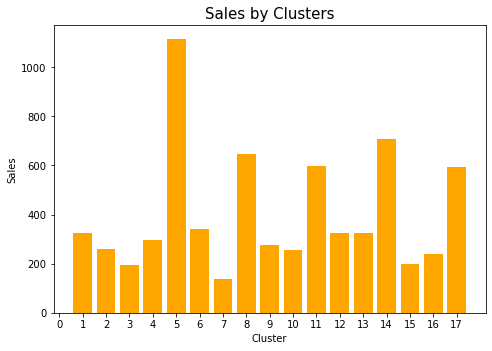

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clusters = df_cluster_sales['cluster']
N = clusters.count()
sales = df_cluster_sales['sales']
ax.set_ylabel('Sales')
ax.set_xlabel('Cluster')
ax.set_title('Sales by Clusters',  fontsize=15)
ax.set_xticks(np.arange(N+1))
ax.bar(clusters,sales, color = 'Orange')
plt.show()

Bubble + Scatter: store sales timeline scatter plot with bubble area size and color asociated with product family.